In [1]:
# importing required nltk libraries
import nltk
from nltk import sent_tokenize

f = open('TheLittlePrince.txt',encoding='utf-8')
text = f.read()
print(text[:50])
print(len(text))

The Little Prince
written and illustrated by
Antoi
90305


In [2]:
# Preprocessing, as explained in the Labs
# Separate the text into sentences first
textsplit = nltk.sent_tokenize(text)
print(textsplit[:10])

['The Little Prince\nwritten and illustrated by\nAntoine de Saint Exupéry\ntranslated from the French by Katherine Woods\n\nOnce when I was six years old I saw a magnificent picture in a book, called True Stories from Nature, about the primeval forest.', 'It was a picture of a boa constrictor in the act of swallowing an animal.', 'Here is a copy of the drawing.', 'In the book it said: "Boa constrictors swallow their prey whole, without chewing it.', 'After that they are not able to move, and they sleep through the six months that they need for digestion."', 'I pondered deeply, then, over the adventures of the jungle.', 'And after some work with a colored pencil I succeeded in making my first drawing.', 'My Drawing Number One.', 'It looked something like this:\n\nDrawing Number One\nI showed my masterpiece to the grown-ups, and asked them whether the drawing frightened them.', 'But they answered: "Frighten?']


In [3]:
# Apply the word tokenizer to each sentence
lowertext = [w.lower() for w in textsplit]

In [6]:
tokentext = [nltk.word_tokenize(sent) for sent in lowertext]
print(tokentext[:2])
#the output is a list of strings that contains the sentences
type(tokentext)
len(tokentext)

[['the', 'little', 'prince', 'written', 'and', 'illustrated', 'by', 'antoine', 'de', 'saint', 'exupéry', 'translated', 'from', 'the', 'french', 'by', 'katherine', 'woods', 'once', 'when', 'i', 'was', 'six', 'years', 'old', 'i', 'saw', 'a', 'magnificent', 'picture', 'in', 'a', 'book', ',', 'called', 'true', 'stories', 'from', 'nature', ',', 'about', 'the', 'primeval', 'forest', '.'], ['it', 'was', 'a', 'picture', 'of', 'a', 'boa', 'constrictor', 'in', 'the', 'act', 'of', 'swallowing', 'an', 'animal', '.']]


1846

In [7]:
## POS Tagging, to retrieve adjective (JJs) and adverb (RBs) tags

# use the Stanford POS tagger to POS tag tokens of each sentence
# this is the default tagger in nltk
taggedtext = [nltk.pos_tag(tokens) for tokens in tokentext]
print(taggedtext[:2])

[[('the', 'DT'), ('little', 'JJ'), ('prince', 'NN'), ('written', 'VBN'), ('and', 'CC'), ('illustrated', 'VBN'), ('by', 'IN'), ('antoine', 'NN'), ('de', 'IN'), ('saint', 'NN'), ('exupéry', 'NN'), ('translated', 'VBN'), ('from', 'IN'), ('the', 'DT'), ('french', 'JJ'), ('by', 'IN'), ('katherine', 'JJ'), ('woods', 'NNS'), ('once', 'RB'), ('when', 'WRB'), ('i', 'NN'), ('was', 'VBD'), ('six', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('i', 'NN'), ('saw', 'VBD'), ('a', 'DT'), ('magnificent', 'JJ'), ('picture', 'NN'), ('in', 'IN'), ('a', 'DT'), ('book', 'NN'), (',', ','), ('called', 'VBN'), ('true', 'JJ'), ('stories', 'NNS'), ('from', 'IN'), ('nature', 'NN'), (',', ','), ('about', 'IN'), ('the', 'DT'), ('primeval', 'NN'), ('forest', 'NN'), ('.', '.')], [('it', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('picture', 'NN'), ('of', 'IN'), ('a', 'DT'), ('boa', 'NN'), ('constrictor', 'NN'), ('in', 'IN'), ('the', 'DT'), ('act', 'NN'), ('of', 'IN'), ('swallowing', 'VBG'), ('an', 'DT'), ('animal', 'NN'), ('.',

In [8]:
# Following our NLTK textbook, chapter on Information Extraction--Chunking (https://www.nltk.org/book/ch07.html)

# Using CHUNKING to parse sentences 
# to look for "adjective phrases", i.e. phrases (or chunks) that have adverbs and adjectives ('RB'+'JJ')
# First step: writing a grammar that defines the POS in the chunk
# we name this grammar "ADJPH" ("ADJective PHrase") using regexes 

import re
grammar_adjph = "ADJPH: {<RB.?>+<JJ.?>}"
# This regex reads as: "find groups ("< >") of RBs (adverbs) together with groups of JJs (adjectives), with groups defineds as
# RBs with any ending (the "." is a placeholder or wildcard for the "R" and the "S" at the end of RBR and RBS, 
# while "?" indicates "optional character" so RB can be found alone as well). Same regex operators apply to JJs.
# Feel free to edit the regex in this grammar, or come up with your own.

# Second step: import the nltk parser to process each sentence
chunk_parser_adj = nltk.RegexpParser(grammar_adjph)

adjph_tags = []
for sent in taggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                adjph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
adjective_phrases = []
for sent in adjph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    adjective_phrases.append(temp)
    
print('First 10 adjective phrases: ', adjective_phrases[:10])


# Following our NLTK textbook, chapter 1 on Language Processing (https://www.nltk.org/book/ch01.html)

## FREQUENCY DISTRIBUTIONS
# Top 50 adjective phrases
freq_adjph = nltk.FreqDist(adjective_phrases)

print('Top adjective phrases by frequency: ')
for word, freq in freq_adjph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adjective phrase sentences: ', len(adjph_tags))


First 10 adjective phrases:  ['not able ', 'not able ', 'very useful ', 'greatly pleased ', 'so i ', 'scarcely enough ', 'more isolated ', 'most extraordinary ', 'too overpowering ', 'so i ']
Top adjective phrases by frequency: 
so i  6
so much  6
so small  5
very much  5
not able  4
very small  4
not important  3
very useful  2
once more  2
too much  2
so important  2
very first  2
too small  2
so little  2
so sad  2
very busy  2
very simple  2
very beautiful  2
much more difficult  2
very strange  2
very different  2
so weak  2
not worth  2
too heavy  2
greatly pleased  1
scarcely enough  1
more isolated  1
most extraordinary  1
too overpowering  1
very dangerous  1
very cumbersome  1
too old  1
very surprised  1
not so small  1
so many  1
so good  1
much greater  1
no longer interested  1
too tall  1
too short  1
now good  1
now bad  1
generally fair-to-middling  1
not little  1
as big  1
so big  1
strictly correct  1
too many  1
very tedious  1
very easy  1
Length of adjective phra

In [9]:
import pandas as pd

#freq_adjph
df_fadj = pd.DataFrame.from_dict(freq_adjph, orient='index')
df_fadj.columns = ['freq']
df_fadj.index.name = 'adj'
print(df_fadj)

#df = pd.DataFrame(freq_adjph, columns = ['word','freq'])
#print(df)

                  freq
adj                   
not able             4
very useful          2
greatly pleased      1
so i                 6
scarcely enough      1
...                ...
so naïve             1
too sat              1
well content         1
not such             1
so now i             1

[140 rows x 1 columns]


<AxesSubplot:>

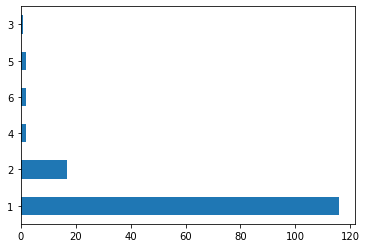

In [10]:
import matplotlib.pyplot as plt
import numpy as np

freqfreq = df_fadj['freq'].value_counts()

freqfreq.plot.barh()

In [11]:
# Now we look for "adverb phrases" or chunks that have 2 consecutive adverbs ('RB')
# First step: writing a grammar that defines POS rules of the adverb phrase the chunk
# we name this grammar "ADVPH" ("ADVerb PHrase")
# Again, feel free to edit the regex in this grammar, or come up with your own!
grammar_advph = "ADVPH: {<RB>+<RB>}"

# Second step: import the nltk parser to process each sentence
chunk_parser_adv = nltk.RegexpParser(grammar_advph)

advph_tags = []
for sent in taggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                advph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
adverb_phrases = []
for sent in advph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    adverb_phrases.append(temp)
    
print('First 10 adverb phrases: ', adverb_phrases[:10])

# top 50 adjective phrases
freq_advph = nltk.FreqDist(adverb_phrases)

print('Top adverb phrases by frequency: ')
for word, freq in freq_advph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adverb phrase sentences: ', len(advph_tags))

First 10 adverb phrases:  ['so then ', "n't much ", 'certainly very much ', 'now i ', 'very slowly ', 'not disobey ', 'little crossly ', 'so often ', 'so then ', 'already very sickly ']
Top adverb phrases by frequency: 
so then  5
far away  4
not even  4
not so  3
very much  3
very well  3
just so  3
once again  3
very slowly  2
much too  2
no longer  2
not yet  2
certainly very  2
not very  2
very rarely  2
too often  2
just alike  2
too long  2
n't much  1
certainly very much  1
now i  1
not disobey  1
little crossly  1
so often  1
already very sickly  1
very far away  1
very far  1
not really  1
only once  1
over again  1
inoffensively upward  1
as soon  1
too late  1
so closely  1
not much  1
so hard  1
there no  1
too far away  1
extremely ugly  1
really very  1
i soon  1
peacefully away  1
very closely  1
i not  1
easily enough  1
very quickly  1
very close  1
just as  1
now completely  1
not only  1
Length of adverb phrase sentences:  110


In [12]:
#freq_advph
df_fadv = pd.DataFrame.from_dict(freq_advph, orient='index')
df_fadv.columns = ['freq']
df_fadv.index.name = 'adv'
print(df_fadv)

                      freq
adv                       
so then                  5
n't much                 1
certainly very much      1
now i                    1
very slowly              2
...                    ...
never yet                1
not entirely             1
so now                   1
surely not               1
very carefully           1

[80 rows x 1 columns]


<AxesSubplot:>

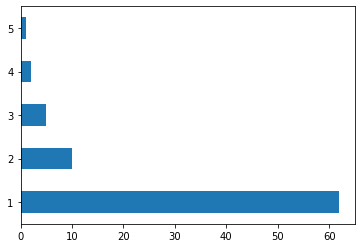

In [13]:
freqfreq2 = df_fadv['freq'].value_counts()

freqfreq2.plot.barh()

In [14]:
# Top 50 adjective tokens

adjective_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['JJ', 'JJR', 'JJS']: # adjective, comparative, superlative (can you think of another way to write this regex?...)
            if len(word)>1:
                adjective_tokens.append(word)
freq_adjective = nltk.FreqDist(adjective_tokens)

for word, freq in freq_adjective.most_common(50):
    print(word,freq)

little 255
good 46
more 25
other 22
old 19
great 19
small 17
much 17
first 16
last 15
true 14
able 13
beautiful 12
important 12
same 12
long 10
such 9
sure 9
sad 9
bad 9
single 9
happy 9
conceited 9
only 8
magnificent 7
difficult 7
enough 7
possible 7
extinct 7
many 6
unique 6
fresh 6
different 6
responsible 6
proud 5
second 5
new 5
big 5
invisible 5
own 5
golden 5
present 5
general 5
afraid 5
whole 4
extraordinary 4
funny 4
asteroid 4
serious 4
turkish 4


In [15]:
# Top 50 adverb tokens

adverb_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['RB', 'RBR', 'RBS']: # adverb, comparative, superlative (again, you can look for ways to write this better!)
            if len(word)>1:
                adverb_tokens.append(word)
freq_adverb = nltk.FreqDist(adverb_tokens)

for word, freq in freq_adverb.most_common(50):
    print(word,freq)

not 166
very 81
so 78
then 74
too 43
never 41
again 36
just 33
now 31
n't 29
only 26
here 24
away 22
once 21
yes 19
always 17
also 17
back 17
much 16
more 16
even 16
still 13
there 12
ever 11
already 10
down 10
far 10
well 10
alone 9
most 9
certainly 9
perhaps 9
as 9
yet 8
first 7
really 6
ago 6
slowly 6
exactly 6
long 6
else 5
about 5
altogether 5
instead 4
scarcely 4
carefully 4
however 4
somewhere 4
no 4
longer 4


In [16]:
## TO DO / YOUR TURN NOW!
## NOUN EXTRACTION
## VERB EXTRACTION
## REMEMBER TO CHECK THE PENN POS TAGS LIST: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
## TO FIND ALL TAGS

In [17]:
# Top 50 noun tokens

noun_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['NN', 'NNS', 'NNP', 'NNPS']: #noun, noun plural, proper noun sing, proper noun pl
            if len(word)>1:
                noun_tokens.append(word)
freq_noun = nltk.FreqDist(noun_tokens)

for word, freq in freq_noun.most_common(50):
    print(word,freq)

prince 185
planet 69
flower 55
time 45
stars 41
sheep 39
fox 36
man 35
nothing 32
day 31
morning 31
king 31
geographer 23
men 22
anything 21
life 21
grown-ups 20
earth 20
drawing 18
water 18
ah 17
night 16
consequence 16
baobabs 16
desert 15
friend 15
one 15
lamp 15
people 14
question 14
thing 14
flowers 14
order 13
orders 13
snake 13
years 12
boa 12
place 12
heart 12
thorns 12
volcanoes 12
lamplighter 12
number 11
something 11
world 11
matters 11
everything 11
way 11
sunset 11
use 11


In [18]:
# Top 50 verb tokens

verb_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']: #verb, past, present, past p, sing present, 3rd person sing
            if len(word)>1:
                verb_tokens.append(word)
freq_verb = nltk.FreqDist(verb_tokens)

for word, freq in freq_verb.most_common(50):
    print(word,freq)

is 298
said 195
was 193
have 143
are 136
be 106
do 83
had 79
am 56
has 38
were 37
made 37
know 36
did 35
been 32
come 32
see 30
make 29
asked 27
does 27
say 23
go 23
look 23
understand 22
answered 20
came 20
replied 19
want 18
put 18
added 17
looked 16
went 16
saw 15
took 14
live 14
think 14
rose 14
seemed 12
looking 12
set 11
draw 11
take 11
tell 11
love 11
laughed 11
let 11
seen 10
find 10
demanded 10
get 10


In [19]:
print('Length of adjective phrase sentences: ', len(adjph_tags))
print('Length of adverb phrase sentences: ', len(advph_tags))
print('Length of adjectives: ', len(adjective_tokens))
print('Length of adverbs: ', len(adverb_tokens))
print('Length of nouns: ', len(noun_tokens))
print('Length of verbs: ', len(verb_tokens))

Length of adjective phrase sentences:  183
Length of adverb phrase sentences:  110
Length of adjectives:  1160
Length of adverbs:  1230
Length of nouns:  2949
Length of verbs:  3381


In [20]:
# Now we have two lists of POS tags combinations we can compare
# We need to get the sentences back from the tagging exercise and run some stats

# Create a list of original sentences from the ADJECTIVE phrase subset:
adjph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in adjph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        adjph_whole_sentences.append(temp)
        
print(len(adjph_whole_sentences))

383


In [21]:
# Create a list of original sentences from the ADVERB phrase subset:
advph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in advph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        advph_whole_sentences.append(temp)
        
print(len(advph_whole_sentences))

224


In [22]:
# OPTIONAL STEP: Combine lists together to have a single list of adjective/adverb phrases:
# Useful to know which sentences are heavy in qualifiers

# create a new variable to store all adjective phrase sentences
adv_adj_phrase_sentences = adjph_whole_sentences

# iterate over adverb phrase sentences
for sent in advph_whole_sentences:
    # if a sentence is not in the adjective phrases list imported
    if sent not in adv_adj_phrase_sentences:
        # attach that sentence
        adv_adj_phrase_sentences.append(sent)

# print the lenght of the list (i.e. number of sentences with both adjective and adverb phrases)
print(len(adv_adj_phrase_sentences))


464


In [23]:
# Following our NLTK textbook, Writing Structural Programs chapter
# section on Procedural vs Declarative style (http://www.nltk.org/book_1ed/ch04.html) 

## CORPUS STATISTICS--SENTENCES LENGTH

# Calculating the average length of sentences in the entire corpus
# from http://www.nltk.org/book_1ed/ch04.html
total_corpus = sum(len(sent) for sent in textsplit) # remember: 'textsplit' is our text split into sentences
print(total_corpus / len(textsplit))

47.5465872156013


In [24]:
# Calculate the average length of an adjective phrase sentence
# We can then compare the average length of the adjective phrases to 
# the average sentences we calculated for all sentences in the corpus
total_adjph_sentences = sum(len(sent) for sent in adjph_whole_sentences) # adjph_whole_sentences stores our adjective phrases
print(total_adjph_sentences / len(adjph_whole_sentences))

8.849137931034482
